In [1]:
import pandas as pd
import matplotlib

In [2]:
carrier_df = pd.read_csv('INSURANCE_CARRIERNAMES.csv')

In [3]:
type(carrier_df)

pandas.core.frame.DataFrame

In [4]:
carrier_df['LENGTH'] = carrier_df['COMPANYNAME'].apply(lambda x: len(x))
carrier_df['SUB_LENGTH'] = carrier_df['COMPANYNAME'].apply(lambda x: len(x))

In [5]:
carrier_df.head()

,COMPANYNAME,LENGTH,SUB_LENGTH
0,1st community insurance services,32,32
1,360 coverage,12,12
2,360 coverage pro,16,16
3,360 coverage pros,17,17
4,360 coveragepros,16,16


In [6]:
carrier_df['PERCENT_LENGTH'] = carrier_df['LENGTH'].apply(lambda x: round(100*x/x))

In [7]:
carrier_df.head()

,COMPANYNAME,LENGTH,SUB_LENGTH,PERCENT_LENGTH
0,1st community insurance services,32,32,100
1,360 coverage,12,12,100
2,360 coverage pro,16,16,100
3,360 coverage pros,17,17,100
4,360 coveragepros,16,16,100


In [8]:
analysis = {'number_names': [len(carrier_df['COMPANYNAME'].unique())], 'avg_pct_len': [100]}
analysis_tail = {'number_names': [len(carrier_df['COMPANYNAME'].unique())], 'avg_pct_len': [100]}
carrier_df_tail = carrier_df.copy()

In [9]:
analysis

{'number_names': [371], 'avg_pct_len': [100]}

In [10]:
avg_pct_min = min(analysis['avg_pct_len'])
avg_pct_min_tail = min(analysis_tail['avg_pct_len'])
substring = 1
substring_tail = 1

In [11]:
while avg_pct_min >= 50:

    carrier_df['COMPANYNAME'] = carrier_df['COMPANYNAME'].apply(lambda x: x[(substring):])
    carrier_df['SUB_LENGTH'] = carrier_df['SUB_LENGTH'].apply(lambda x: (x-substring))
    carrier_df['PERCENT_LENGTH'] = 100*(carrier_df['SUB_LENGTH']/carrier_df['LENGTH'])
    analysis['number_names'].append(len(carrier_df['COMPANYNAME'].unique()))
    print(round(carrier_df['PERCENT_LENGTH'].mean()))
    analysis['avg_pct_len'].append(round(carrier_df['PERCENT_LENGTH'].mean()))
#     substring += 1
    avg_pct_min = carrier_df['PERCENT_LENGTH'].mean()


95
90
85
80
76
71
66
61
56
51
46


In [12]:
# carrier_df

In [13]:
analysis

{'number_names': [371, 371, 371, 366, 356, 350, 345, 330, 322, 316, 311, 303],
 'avg_pct_len': [100, 95, 90, 85, 80, 76, 71, 66, 61, 56, 51, 46]}

In [14]:
analysis_df = pd.DataFrame(analysis)

In [15]:
analysis_df

,number_names,avg_pct_len
0,371,100
1,371,95
2,371,90
3,366,85
4,356,80
5,350,76
6,345,71
7,330,66
8,322,61
9,316,56


In [16]:
analysis_df.plot(x='avg_pct_len', y='number_names')

In [17]:
# while avg_pct_min_tail >= 50:

#     carrier_df_tail['COMPANYNAME'] = carrier_df_tail['COMPANYNAME'].apply(lambda x: x[:len(x)-(substring_tail)])
#     carrier_df_tail['SUB_LENGTH'] = carrier_df_tail['LENGTH'].apply(lambda x: (x-substring_tail))
#     carrier_df_tail['PERCENT_LENGTH'] = 100*(carrier_df_tail['SUB_LENGTH']/carrier_df_tail['LENGTH'])
#     analysis_tail['number_names'].append(len(carrier_df_tail['COMPANYNAME'].unique()))
#     print(carrier_df_tail['COMPANYNAME'].unique())
#     analysis_tail['avg_pct_len'].append(round(carrier_df_tail['PERCENT_LENGTH'].mean()))
#     substring_tail += 1
#     avg_pct_min_tail = min(analysis_tail['avg_pct_len'])


In [18]:
# analysis_df_tail = pd.DataFrame(analysis_tail)

In [19]:
# analysis_df_tail

In [20]:
# analysis_df_tail.plot(x='avg_pct_len', y='number_names')

In [21]:
carrier_df_tail

,COMPANYNAME,LENGTH,SUB_LENGTH,PERCENT_LENGTH
0,1st community insurance services,32,32,100
1,360 coverage,12,12,100
2,360 coverage pro,16,16,100
3,360 coverage pros,17,17,100
4,360 coveragepros,16,16,100
...,...,...,...,...
366,world financial group,21,21,100
367,"world financial group, inc.",27,27,100
368,worldwide brokers and agents,28,28,100
369,xl specialty insurance co.,26,26,100


In [22]:
# Cartesian product function from a previous project
def cartesian_product_basic(left, right):
    return (
       left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))

cctdf = cartesian_product_basic(carrier_df_tail, carrier_df_tail)
cctdf.head()


,COMPANYNAME_x,LENGTH_x,SUB_LENGTH_x,PERCENT_LENGTH_x,COMPANYNAME_y,LENGTH_y,SUB_LENGTH_y,PERCENT_LENGTH_y
0,1st community insurance services,32,32,100,1st community insurance services,32,32,100
1,1st community insurance services,32,32,100,360 coverage,12,12,100
2,1st community insurance services,32,32,100,360 coverage pro,16,16,100
3,1st community insurance services,32,32,100,360 coverage pros,17,17,100
4,1st community insurance services,32,32,100,360 coveragepros,16,16,100


In [23]:
cctdf['CONCAT_COMPANYNAME'] = cctdf['COMPANYNAME_x'] + cctdf['COMPANYNAME_y']
analysis_cctdf = {'number_names': [len(cctdf['CONCAT_COMPANYNAME'].unique())], 'avg_pct_len_x': [100], 'avg_pct_len_y': [100]}

In [24]:
# run same analysis as above but using a crossjoin instead
while avg_pct_min_tail >= 50:

    cctdf['COMPANYNAME_x'] = cctdf['COMPANYNAME_x'].apply(lambda x: x[:len(x)-(substring_tail)])
    cctdf['COMPANYNAME_y'] = cctdf['COMPANYNAME_y'].apply(lambda x: x[:len(x)-(substring_tail)])
    cctdf['SUB_LENGTH_x'] = cctdf['SUB_LENGTH_x'].apply(lambda x: (x-substring_tail))
    cctdf['SUB_LENGTH_y'] = cctdf['SUB_LENGTH_y'].apply(lambda x: (x-substring_tail))
    cctdf['PERCENT_LENGTH_x'] = 100*(cctdf['SUB_LENGTH_x']/cctdf['LENGTH_x'])
    cctdf['PERCENT_LENGTH_y'] = 100*(cctdf['SUB_LENGTH_y']/cctdf['LENGTH_y'])
    cctdf['CONCAT_COMPANYNAME'] = cctdf['COMPANYNAME_x'] + cctdf['COMPANYNAME_y']
    analysis_cctdf['number_names'].append(len(cctdf['CONCAT_COMPANYNAME'].unique()))
    print(cctdf['COMPANYNAME_x'].unique())
    analysis_cctdf['avg_pct_len_x'].append(round(cctdf['PERCENT_LENGTH_x'].mean()))
    analysis_cctdf['avg_pct_len_y'].append(round(cctdf['PERCENT_LENGTH_y'].mean()))
#     substring_tail += 1
    avg_pct_min_tail = min(analysis_cctdf['avg_pct_len_x'])


['1st community insurance service' '360 coverag' '360 coverage pr'
 '360 coverage pro' '360 coveragepro' '360 degree coverage pro'
 'Willis Fe' 'aaa life insurance co' 'aai' 'abi administrative service'
 'accord insuranc' 'ace american insurance compan' 'ace financial grou'
 'ace financial group lt' 'acor' 'admiral indemnity compan'
 'admiral insurance c' 'admiral insurance compan'
 'aeon risk services northeast, in' 'affinity insurance servic'
 'aggressive insurance service ll' 'aggressive insurance services, ll'
 'aif- agency ins & financia' 'aig life insurance co'
 'aig specialty insurance compan' 'ajg gallager-affinit'
 'allen & associate' 'allian' 'allianz global risks us insurance c'
 'allianz underwriters insurance compan' 'allied world assurance ins c'
 'allied world insurance compan' 'allied world specialty insurance compan'
 'allied world surplus lines insuranc'
 'allied world surplus lines insurance compan'
 'american administrative group (tpa' 'american affinity grou'
 'ame

['1st community insurance servic' '360 covera' '360 coverage p'
 '360 coverage pr' '360 coveragepr' '360 degree coverage pr' 'Willis F'
 'aaa life insurance c' 'aa' 'abi administrative servic' 'accord insuran'
 'ace american insurance compa' 'ace financial gro'
 'ace financial group l' 'aco' 'admiral indemnity compa'
 'admiral insurance ' 'admiral insurance compa'
 'aeon risk services northeast, i' 'affinity insurance servi'
 'aggressive insurance service l' 'aggressive insurance services, l'
 'aif- agency ins & financi' 'aig life insurance c'
 'aig specialty insurance compa' 'ajg gallager-affini' 'allen & associat'
 'allia' 'allianz global risks us insurance '
 'allianz underwriters insurance compa' 'allied world assurance ins '
 'allied world insurance compa' 'allied world specialty insurance compa'
 'allied world surplus lines insuran'
 'allied world surplus lines insurance compa'
 'american administrative group (tp' 'american affinity gro'
 'american alternative insurance compa'
 '

['1st community insurance serv' '360 cove' '360 coverage' '360 coverage '
 '360 degree coverage ' 'Willis' 'aaa life insurance' ''
 'abi administrative serv' 'accord insur' 'ace american insurance com'
 'ace financial g' 'ace financial group' 'a' 'admiral indemnity com'
 'admiral insuranc' 'admiral insurance com'
 'aeon risk services northeast,' 'affinity insurance ser'
 'aggressive insurance service' 'aggressive insurance services,'
 'aif- agency ins & finan' 'aig life insurance'
 'aig specialty insurance com' 'ajg gallager-affi' 'allen & associ' 'all'
 'allianz global risks us insuranc' 'allianz underwriters insurance com'
 'allied world assurance in' 'allied world insurance com'
 'allied world specialty insurance com' 'allied world surplus lines insur'
 'allied world surplus lines insurance com'
 'american administrative group (' 'american affinity g'
 'american alternative insurance com'
 'american alternative insurance corpora' 'american auto ins com'
 'american automobile insuran

['1st community insurance se' '360 co' '360 covera' '360 coverag'
 '360 degree coverag' 'Will' 'aaa life insuran' '' 'abi administrative se'
 'accord ins' 'ace american insurance c' 'ace financial'
 'ace financial gro' 'admiral indemnity c' 'admiral insura'
 'admiral insurance c' 'aeon risk services northeas'
 'affinity insurance s' 'aggressive insurance servi'
 'aggressive insurance service' 'aif- agency ins & fin' 'aig life insuran'
 'aig specialty insurance c' 'ajg gallager-af' 'allen & asso' 'a'
 'allianz global risks us insura' 'allianz underwriters insurance c'
 'allied world assurance ' 'allied world insurance c'
 'allied world specialty insurance c' 'allied world surplus lines ins'
 'allied world surplus lines insurance c' 'american administrative group'
 'american affinity' 'american alternative insurance c'
 'american alternative insurance corpo' 'american auto ins c'
 'american automobile insurance c' 'american capitol insuran'
 'american endurance specialty ' 'american fami

['1st community insurance s' '360 c' '360 cover' '360 covera'
 '360 degree covera' 'Wil' 'aaa life insura' '' 'abi administrative s'
 'accord in' 'ace american insurance ' 'ace financia' 'ace financial gr'
 'admiral indemnity ' 'admiral insur' 'admiral insurance '
 'aeon risk services northea' 'affinity insurance '
 'aggressive insurance serv' 'aggressive insurance servic'
 'aif- agency ins & fi' 'aig life insura' 'aig specialty insurance '
 'ajg gallager-a' 'allen & ass' 'allianz global risks us insur'
 'allianz underwriters insurance ' 'allied world assurance'
 'allied world insurance ' 'allied world specialty insurance '
 'allied world surplus lines in' 'allied world surplus lines insurance '
 'american administrative grou' 'american affinit'
 'american alternative insurance ' 'american alternative insurance corp'
 'american auto ins ' 'american automobile insurance '
 'american capitol insura' 'american endurance specialty'
 'american family home insurance ' 'american family life a

['1st community insurance' '360' '360 cov' '360 cove' '360 degree cove'
 'W' 'aaa life insu' '' 'abi administrative' 'accord '
 'ace american insuranc' 'ace financ' 'ace financial ' 'admiral indemnit'
 'admiral ins' 'admiral insuranc' 'aeon risk services north'
 'affinity insuranc' 'aggressive insurance se' 'aggressive insurance serv'
 'aif- agency ins & ' 'aig life insu' 'aig specialty insuranc'
 'ajg gallager' 'allen & a' 'allianz global risks us ins'
 'allianz underwriters insuranc' 'allied world assuran'
 'allied world insuranc' 'allied world specialty insuranc'
 'allied world surplus lines ' 'allied world surplus lines insuranc'
 'american administrative gr' 'american affin'
 'american alternative insuranc' 'american alternative insurance co'
 'american auto in' 'american automobile insuranc' 'american capitol insu'
 'american endurance special' 'american family home insuranc'
 'american family life assura' 'american farmers & ranchers mutual ins'
 'american guarantee & ' 'america

['1st community insuran' '3' '360 c' '360 co' '360 degree co' ''
 'aaa life in' 'abi administrati' 'accor' 'ace american insura' 'ace fina'
 'ace financia' 'admiral indemn' 'admiral i' 'admiral insura'
 'aeon risk services nor' 'affinity insura' 'aggressive insurance '
 'aggressive insurance se' 'aif- agency ins ' 'aig life in'
 'aig specialty insura' 'ajg gallag' 'allen &' 'allianz global risks us i'
 'allianz underwriters insura' 'allied world assur' 'allied world insura'
 'allied world specialty insura' 'allied world surplus line'
 'allied world surplus lines insura' 'american administrative '
 'american aff' 'american alternative insura'
 'american alternative insurance ' 'american auto '
 'american automobile insura' 'american capitol in'
 'american endurance speci' 'american family home insura'
 'american family life assu' 'american farmers & ranchers mutual i'
 'american guarantee ' 'american international specialty lines '
 'american national family o' 'american national proper

In [25]:
analysis_df_tail = pd.DataFrame(analysis_cctdf)
analysis_df_tail

,number_names,avg_pct_len_x,avg_pct_len_y
0,137641,100,100
1,137641,95,95
2,137641,90,90
3,135055,85,85
4,132131,80,80
5,127807,76,76
6,124959,71,71
7,122150,66,66
8,121452,61,61
9,120756,56,56


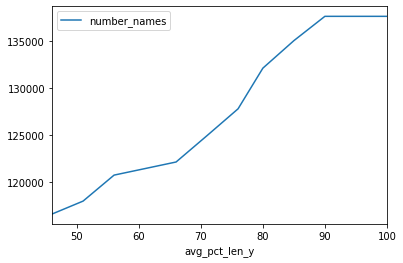

In [26]:
analysis_df_tail.plot(x='avg_pct_len_y', y='number_names')

In [27]:
# It looks to be approximately that the decision boundary is 70%
# I will calculate the actual decision boundary later
from approx_match_list import approx_match_list

In [28]:
name_list = pd.read_csv('INSURANCE_CARRIERNAMES.csv')
approx_match_names = approx_match_list(name_list['COMPANYNAME'].to_list(), 0.70)

In [29]:
approx_match_names

['1st community insurance services',
 '360 coverage',
 '360 coverage pro',
 '360 coverage pros',
 '360 coveragepros',
 '360 degree coverage pros',
 'Willis Fee',
 'aaa life insurance co.',
 'aaic',
 'abi administrative services',
 'accord insurance',
 'ace american insurance company',
 'ace financial group',
 'ace financial group ltd',
 'acord',
 'admiral indemnity company',
 'admiral insurance co',
 'admiral insurance company',
 'aeon risk services northeast, inc',
 'affinity insurance service',
 'aggressive insurance service llc',
 'aggressive insurance services, llc',
 'aif- agency ins & financial',
 'aig life insurance co.',
 'aig specialty insurance company',
 'ajg gallager-affinity',
 'allen & associates',
 'alliant',
 'allianz global risks us insurance co',
 'allianz underwriters insurance company',
 'allied world assurance ins co',
 'allied world insurance company',
 'allied world specialty insurance company',
 'allied world surplus lines insurance',
 'allied world surplus line

In [30]:
len(name_list['COMPANYNAME'].to_list())

371

In [31]:
len(approx_match_names)

369

In [32]:
split_names = [name.split() for name in approx_match_names]
empty_list = []
full_names = []

In [33]:
for name, split in zip(approx_match_names,split_names):
    if len(split) > 3 or len(split) == 1:
        full_names.append(name)
    else:
        empty_list.append(name)

In [34]:
full_names

['1st community insurance services',
 '360 degree coverage pros',
 'aaa life insurance co.',
 'aaic',
 'ace american insurance company',
 'ace financial group ltd',
 'acord',
 'aeon risk services northeast, inc',
 'aggressive insurance service llc',
 'aggressive insurance services, llc',
 'aif- agency ins & financial',
 'aig life insurance co.',
 'aig specialty insurance company',
 'alliant',
 'allianz global risks us insurance co',
 'allianz underwriters insurance company',
 'allied world assurance ins co',
 'allied world insurance company',
 'allied world specialty insurance company',
 'allied world surplus lines insurance',
 'allied world surplus lines insurance company',
 'american administrative group (tpa)',
 'american alternative insurance company',
 'american alternative insurance corporation',
 'american auto ins company',
 'american automobile insurance company',
 'american capitol insurance co.',
 'american endurance specialty ins co',
 'american family home insurance compan